In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [23]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [24]:
from pmdarima.arima import auto_arima

In [25]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [26]:
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

In [34]:
data = pd.read_csv("covidData.csv")
data.head(5)

,Date,India,USA
0,2020-01-30,1,5
1,2020-01-31,1,6
2,2020-02-01,1,7
3,2020-02-02,2,8
4,2020-02-03,2,11


In [35]:
print("Size/Shape of the dataset ", data.shape)
print("Checking for null values ", data.isnull().sum())
print("Checking Data - type ", data.dtypes)

Size/Shape of the dataset  (301, 3)
Checking for null values  Date     0
India    0
USA      0
dtype: int64
Checking Data - type  Date     object
India     int64
USA       int64
dtype: object


In [37]:
#Dropping
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [38]:
data.head(5)

,Date,India,USA
0,2020-01-30,1,5
1,2020-01-31,1,6
2,2020-02-01,1,7
3,2020-02-02,2,8
4,2020-02-03,2,11


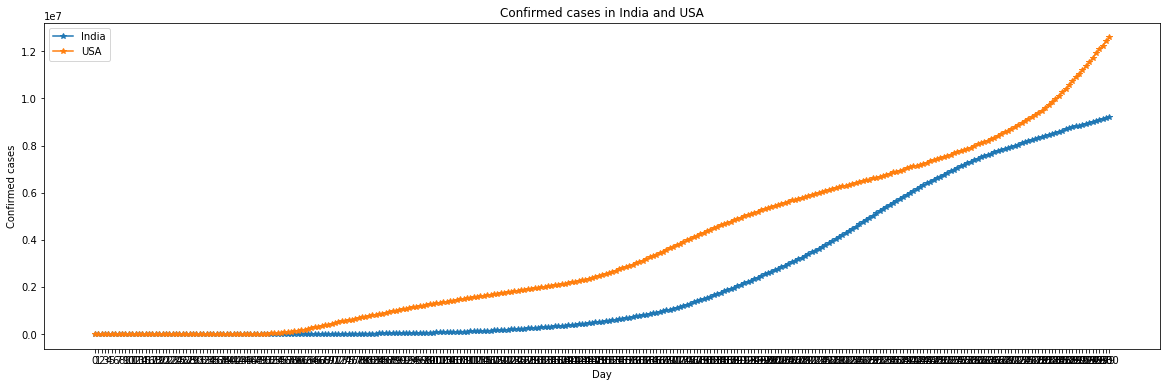

In [52]:
for j in range(1, 2):
    plt.figure(figsize=(20,6))
    for tt in data.columns[1:3]:
        cases = data[[tt]]
        cases = cases.reset_index(drop=True)
        cases = cases.rolling(2).mean().fillna(0)
        plt.plot([str(i) for i in cases[tt].index], data[tt], marker = '*', label = tt)
    
    plt.title("Confirmed cases in India and USA")
    plt.legend()
    plt.xlabel('Day')
    plt.ylabel('Confirmed cases')
    plt.show()

In [55]:
mse_list = []
best_pair = {}
for tt in data.columns:
    selected = []
    cases = data[[tt]]
    cases = cases.reset_index(drop = True)
    cases_list1 = cases.iloc[:, 0].values
    for rj in data.columns:
        if rj != tt:
            cases1 = data[[rj]]
            cases1 = cases1.reset_index(drop=True)
            cases_list2 = cases.iloc[:,0].values
            if len(cases_list1) < len(cases_list2):
                corr = np.corrcoef(cases_list1, cases_list2[:len(cases_list1)])[0, 1]
                mse = (np.square(cases_list1 - cases_list2[:len(cases_list1)])).mean()
                mse_list.append(mse)
                if((mase <9000) & (corr >.7)):
                    if len(cases1[rj]) > len(cases[tt])+7:
                        plt.figure(figSize=(21,6))
                        plt.plot([str(i) for i in cases[tt].index], cases[tt], marker = '*', label=tt)
                        plt.plot([str(i) for i in cases1[rj].index], cases1[rj], marker = '*', label=rj)
                        plt.title("Correlation {}, MSE {}".format(round(corr*100, 2), mse))
                        plt.legend()
                        plt.xlabel('Day')
                        plt.ylabel('Confirmed Cases')
                        plt.show()
                        selected.append(cases_list2[:len(cases_list1) + 7])
    if len(selected)>0:
        best_pair[tt] = selected

In [57]:
print(data[["India"]])

       India
0          1
1          1
2          1
3          2
4          2
..       ...
296  9050597
297  9095806
298  9139865
299  9177840
300  9222216

[301 rows x 1 columns]


In [58]:
cases = data[["India"]]
Y = cases[cases["India"] > 0].reset_index(drop = True).iloc[:, 0].values
print(Y)

[      1       1       1       2       2       3       3       3       3
       3       3       3       3       3       3       3       3       3
       3       3       3       3       3       3       3       3       3
       3       3       3       3       3       3       5       6      28
      29      31      34      34      44      50      73      75      83
      90      93     125     137     165     191     231     320     439
     492     562     649     724     873     979    1071    1251    1397
    1965    2301    2902    3374    4067    4421    5194    5734    6412
    7447    8356    9152   10363   11438   12380   13387   14378   15712
   17265   18600   19984   21393   23077   24506   26496   27892   29435
   31332   33050   35043   37336   39980   42533   46433   49391   52952
   56342   59662   62939   67152   70756   74281   78003   81970   85940
   90927   96169  101139  106750  112359  118447  125101  131868  138845
  145380  151767  158333  165799  173763  182143  1

In [61]:
X = pd.DataFrame(np.vstack(Y).T)
X_train = X.iloc[:len(Y), :].values
X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,1,1,1,2,2,3,3,3,3,3,...,8845127,8874290,8912907,8958483,9004365,9050597,9095806,9139865,9177840,9222216


In [62]:
model = auto_arima(Y, exogenous=X_train,
                  start_p = 1, d= 0, start_q = 1, max_p=3, max_d = 3, max_q = 3, m = 7, start_P = 0, D = 0, start_Q = 0, max_P = 3, max_D = 3,
                   seasonal=True,max_
                  d = 0, D = 0, trace = True, error_action = 'ignore', suppress_warnings = True,stepwise = True)


ValueError: Found input variables with inconsistent numbers of samples: [1, 301]